## PCA 2D

In this problem, you will use PCA to perform a kind of de-noising.

The snippet of code below creates a simple 2D fake data set with a clear 1D structure within it. We want to try to recover that structure using the SVD. Do this by carrying out the following steps.

1) Form a data matrix, this should be a 100x2 matrix with each "feature" being a data column.
2) Mean center each column. Keep track of the means of each column as you will need them later.
3) Compute the SVD and print the singular values. One should be significantly larger (more important) than the other.
4) Print the first column of V. What is its slope? How does this compare to the slope of our generated data (which is 1/3)?
5) Simplify U and V to be 1 column each (we are throwing away the second, less important columns) and reduce the dimension of D similarly (to 1x1 in this case). You should now have Ured, Vred, and Dred.
6) The original data was stored in U*D*V'. The reduced data is constructed as Ured*Dred*Vred'. Compute this.
7) Remember, you mean shifted the data so that the column means were 0. If we try to plot this reduced data, it will have mean 0. So if we want to really reconstrcut a simplified version of the data, we need to "undo" that mean centering. We thus need to carry out Ured*Dred*Vred' + means where the means were found earlier. Do this.
8) Plot the reduced data overlayed on the original data. You should see that we found the essential structure.

In [1]:
using Pkg

Pkg.add("Images")
Pkg.add("ImageFeatures")
Pkg.add("LinearAlgebra")
Pkg.add("BenchmarkTools")
Pkg.add("Plots")

using Images, ImageFeatures 
using LinearAlgebra
using BenchmarkTools
using Plots


  Activating new project at `~/Q520_Winter24_Env`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed ImageMagick_jll ─── v6.9.11+4
   Installed Libtiff_jll ─────── v4.4.0+0
   Installed ImageSegmentation ─ v1.8.2
   Installed JLD2 ────────────── v0.4.46
   Installed LittleCMS_jll ───── v2.12.0+0
   Installed OpenJpeg_jll ────── v2.4.0+0
   Installed ImageBase ───────── v0.1.7
   Installed AxisAlgorithms ──── v1.1.0
   Installed ImageMagick ─────── v1.3.1
   Installed WoodburyMatrices ── v1.0.0
   Installed ImageCore ───────── v0.10.2
   Installed Interpolations ──── v0.15.1
   Installed ImageFiltering ──── v0.7.8
    Updating `~/Q520_Winter24_Env/Project.toml`
  [916415d5] + Images v0.26.0
    Updating `~/Q520_Winter24_Env/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [79e6a3ab] + Adapt v4.0.4
⌅ [ec485272] + ArnoldiMethod v0.2.0
  [4fba245c] + ArrayInterface v7.9.0
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArray

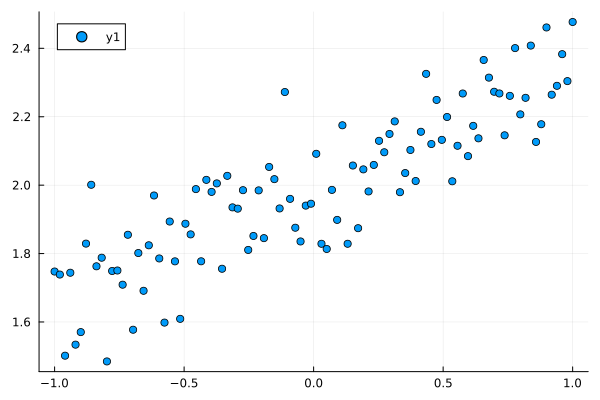

In [2]:
# Construct and plot a fake data set.
# This data set is a noisy plot of the line y = 1/3 * x + 2
x1 = Vector(LinRange(-1,1,100));
x2 = 1/3 .* x1 .+ 2 + 0.1.*randn(size(x1));

plot(x1,x2, seriestype = :scatter)

In [3]:
#construct data
data_matrix = hcat(x1, x2)

# Mean center each column
means = mean(data_matrix, dims=1) # Mean of each column
data_centered = data_matrix .- means

100×2 Matrix{Float64}:
 -1.0       -0.437032
 -0.979798  -0.211063
 -0.959596  -0.346124
 -0.939394  -0.146204
 -0.919192  -0.215472
 -0.89899   -0.352823
 -0.878788  -0.278456
 -0.858586  -0.269845
 -0.838384  -0.310721
 -0.818182  -0.413017
  ⋮         
  0.838384   0.46598
  0.858586   0.423924
  0.878788   0.453416
  0.89899    0.37799
  0.919192   0.369052
  0.939394   0.264231
  0.959596   0.302687
  0.979798   0.428299
  1.0        0.210493

In [5]:
#remove the second column of U
Ured = U[:,1]

#remove the second column of V
Vred = V[:,1]

#remove the second element of S
Dred = S[1]

Ured, Dred, Vred  

#check size of the Ured, Dred, and Vred
size(Ured), size(Dred), size(Vred)

# Reconstruct the data using the reduced matrices
data_reduced = Ured*Dred*Vred' 

100×2 Matrix{Float64}:
 -1.02752   -0.358041
 -0.939296  -0.327298
 -0.963248  -0.335644
 -0.883113  -0.307721
 -0.886622  -0.308944
 -0.911285  -0.317538
 -0.870163  -0.303209
 -0.849472  -0.295999
 -0.844159  -0.294148
 -0.85793   -0.298946
  ⋮         
  0.892401   0.310958
  0.897349   0.312681
  0.924527   0.322152
  0.919105   0.320263
  0.934343   0.325572
  0.919787   0.3205
  0.949751   0.330941
  1.0068     0.350818
  0.957134   0.333514

Singular values: [6.165882220793998, 0.9843632196228825]


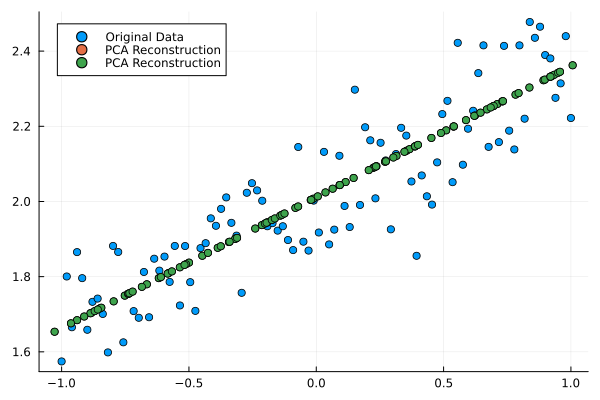

In [7]:


# SVD
U, S, V = svd(data_centered) # Using S for the vector of singular values
println("Singular values: ", S)


Ured = U[:, 1]
Sred = S[1]
Vred = V[:, 1]

# reduced data matrix
data_reduced = Ured * diagm([Sred]) * transpose(Vred)

# add mean again
data_reconstructed = data_reduced .+ means

# Plot 
plot!(data_reconstructed[:, 1], data_reconstructed[:, 2], seriestype = :scatter, label="PCA Reconstruction")
